<a href="https://colab.research.google.com/github/Diperez90/Estadistica-Analisis-Datos-RStudio-Python/blob/master/ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017

Code Repository: https://github.com/rasbt/python-machine-learning-book-2nd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

# Python Machine Learning - Code Examples

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Python_Machine_learning/Capitulo02

Mounted at /content/drive/
/content/drive/MyDrive/Python_Machine_learning/Capitulo02


# Chapter 2 - Training Machine Learning Algorithms for Classification

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [2]:
#load_ext( watermark)
#watermark -a "Sebastian Raschka" -u -d -p numpy,pandas,matplotlib

*The use of `watermark` is optional. You can install this IPython extension via "`pip install watermark`". For more information, please see: https://github.com/rasbt/watermark.*

### Overview


- [Artificial neurons ‚Äì a brief glimpse into the early history of machine learning](#Artificial-neurons-a-brief-glimpse-into-the-early-history-of-machine-learning)
    - [The formal definition of an artificial neuron](#The-formal-definition-of-an-artificial-neuron)
    - [The perceptron learning rule](#The-perceptron-learning-rule)
- [Implementing a perceptron learning algorithm in Python](#Implementing-a-perceptron-learning-algorithm-in-Python)
    - [An object-oriented perceptron API](#An-object-oriented-perceptron-API)
    - [Training a perceptron model on the Iris dataset](#Training-a-perceptron-model-on-the-Iris-dataset)
- [Adaptive linear neurons and the convergence of learning](#Adaptive-linear-neurons-and-the-convergence-of-learning)
    - [Minimizing cost functions with gradient descent](#Minimizing-cost-functions-with-gradient-descent)
    - [Implementing an Adaptive Linear Neuron in Python](#Implementing-an-Adaptive-Linear-Neuron-in-Python)
    - [Improving gradient descent through feature scaling](#Improving-gradient-descent-through-feature-scaling)
    - [Large scale machine learning and stochastic gradient descent](#Large-scale-machine-learning-and-stochastic-gradient-descent)
- [Summary](#Summary)

<br>
<br>

In [3]:
from IPython.display import Image

# Artificial neurons - a brief glimpse into the early history of machine learning

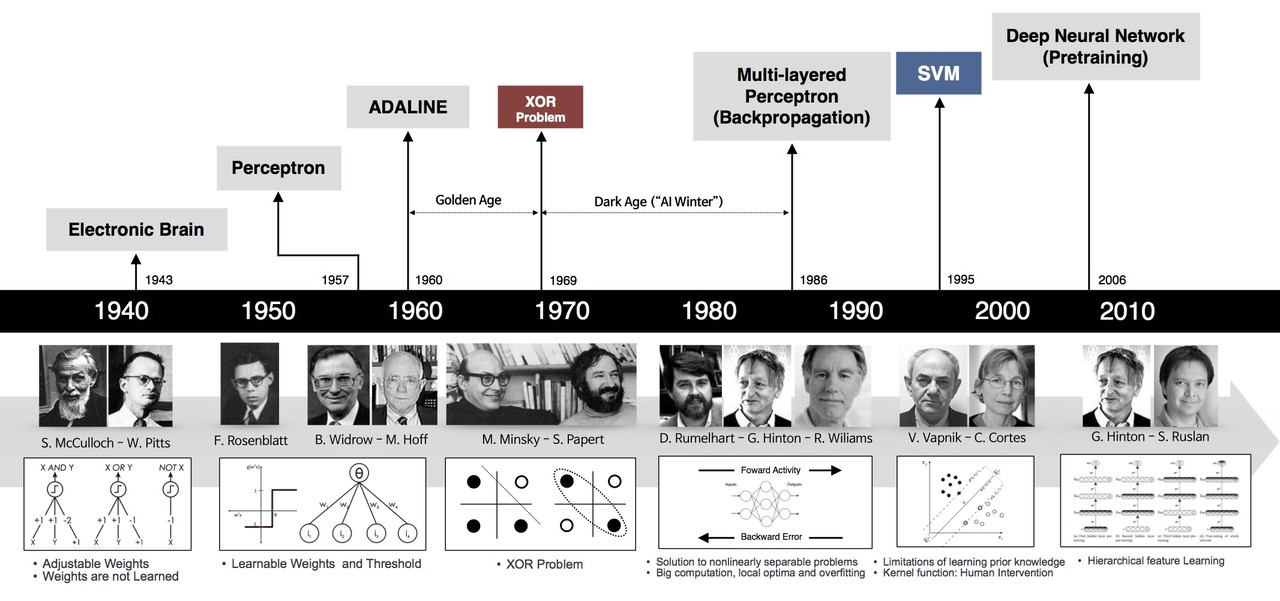

In [4]:
Image(filename='./images/cap2-nn-history.jpeg', width=900)

https://www.linkedin.com/pulse/history-neural-networks-datta-dharanikota/

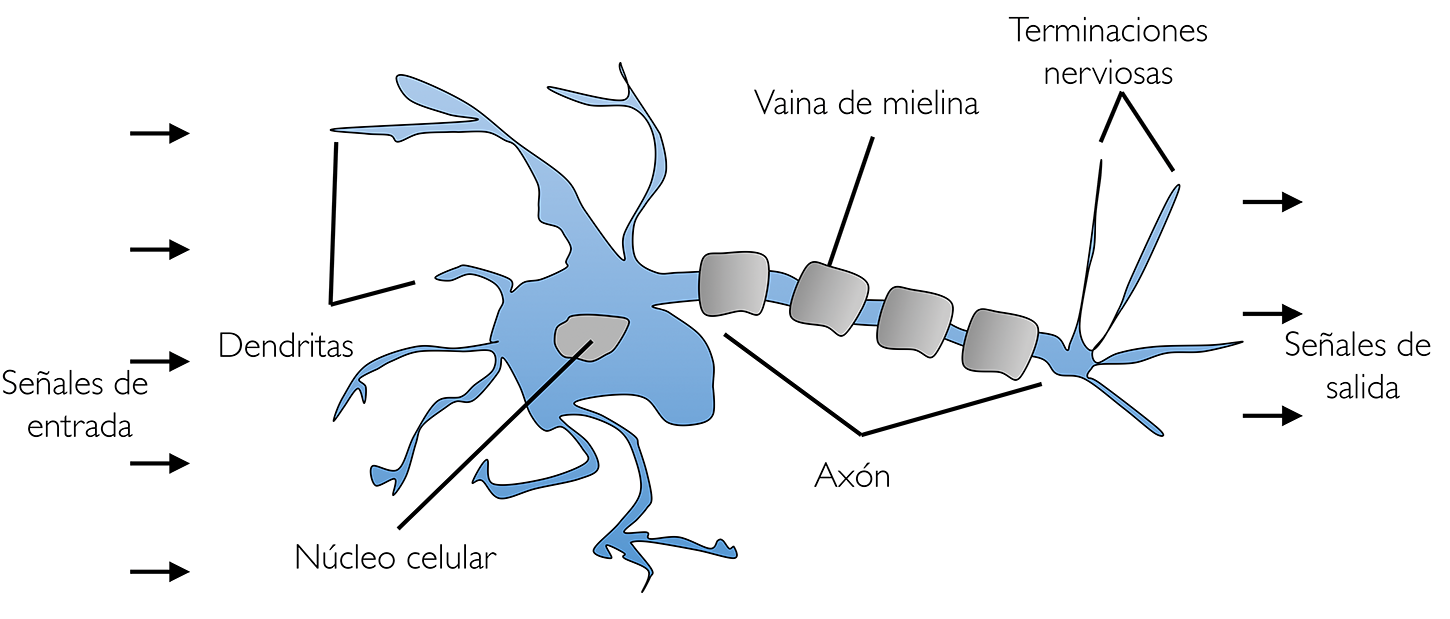

In [5]:
Image(filename='./images/02_01.png', width=500)

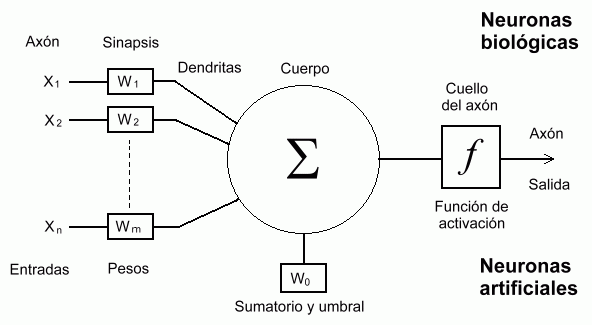

In [6]:
Image(filename='./images/neuron_artificial.png', width=500)

https://ml4a.github.io/ml4a/es/neural_networks/#:~:text=En%20su%20lugar%2C%20la%20mayor%C3%ADa,x%20(%200%20%2C%20z%20)%20.

## The formal definition of an artificial neuron


Weights  $$ w=\begin{bmatrix} w_1\\ ..\\ w_m \\ \end{bmatrix}$$   
Input Samples  $$ x=\begin{bmatrix} x_1\\ ..\\ x_m \\ \end{bmatrix}$$

$$ z=w_0*x_0+w_1*x_1+w_2*x_2+...+w_m*x_m $$
$$ = b +w_1*x_1+w_2*x_2+...+w_m*x_m $$
$$z=b+\sum_{j=0}^{m} {x_j w_j} $$
Dot product $$z= b+w_x^T.x $$

Activaton function

$$ ùõü(z)=\begin{Bmatrix} 1 & if & z>0 \\
-1 & otherwise \end{Bmatrix} $$

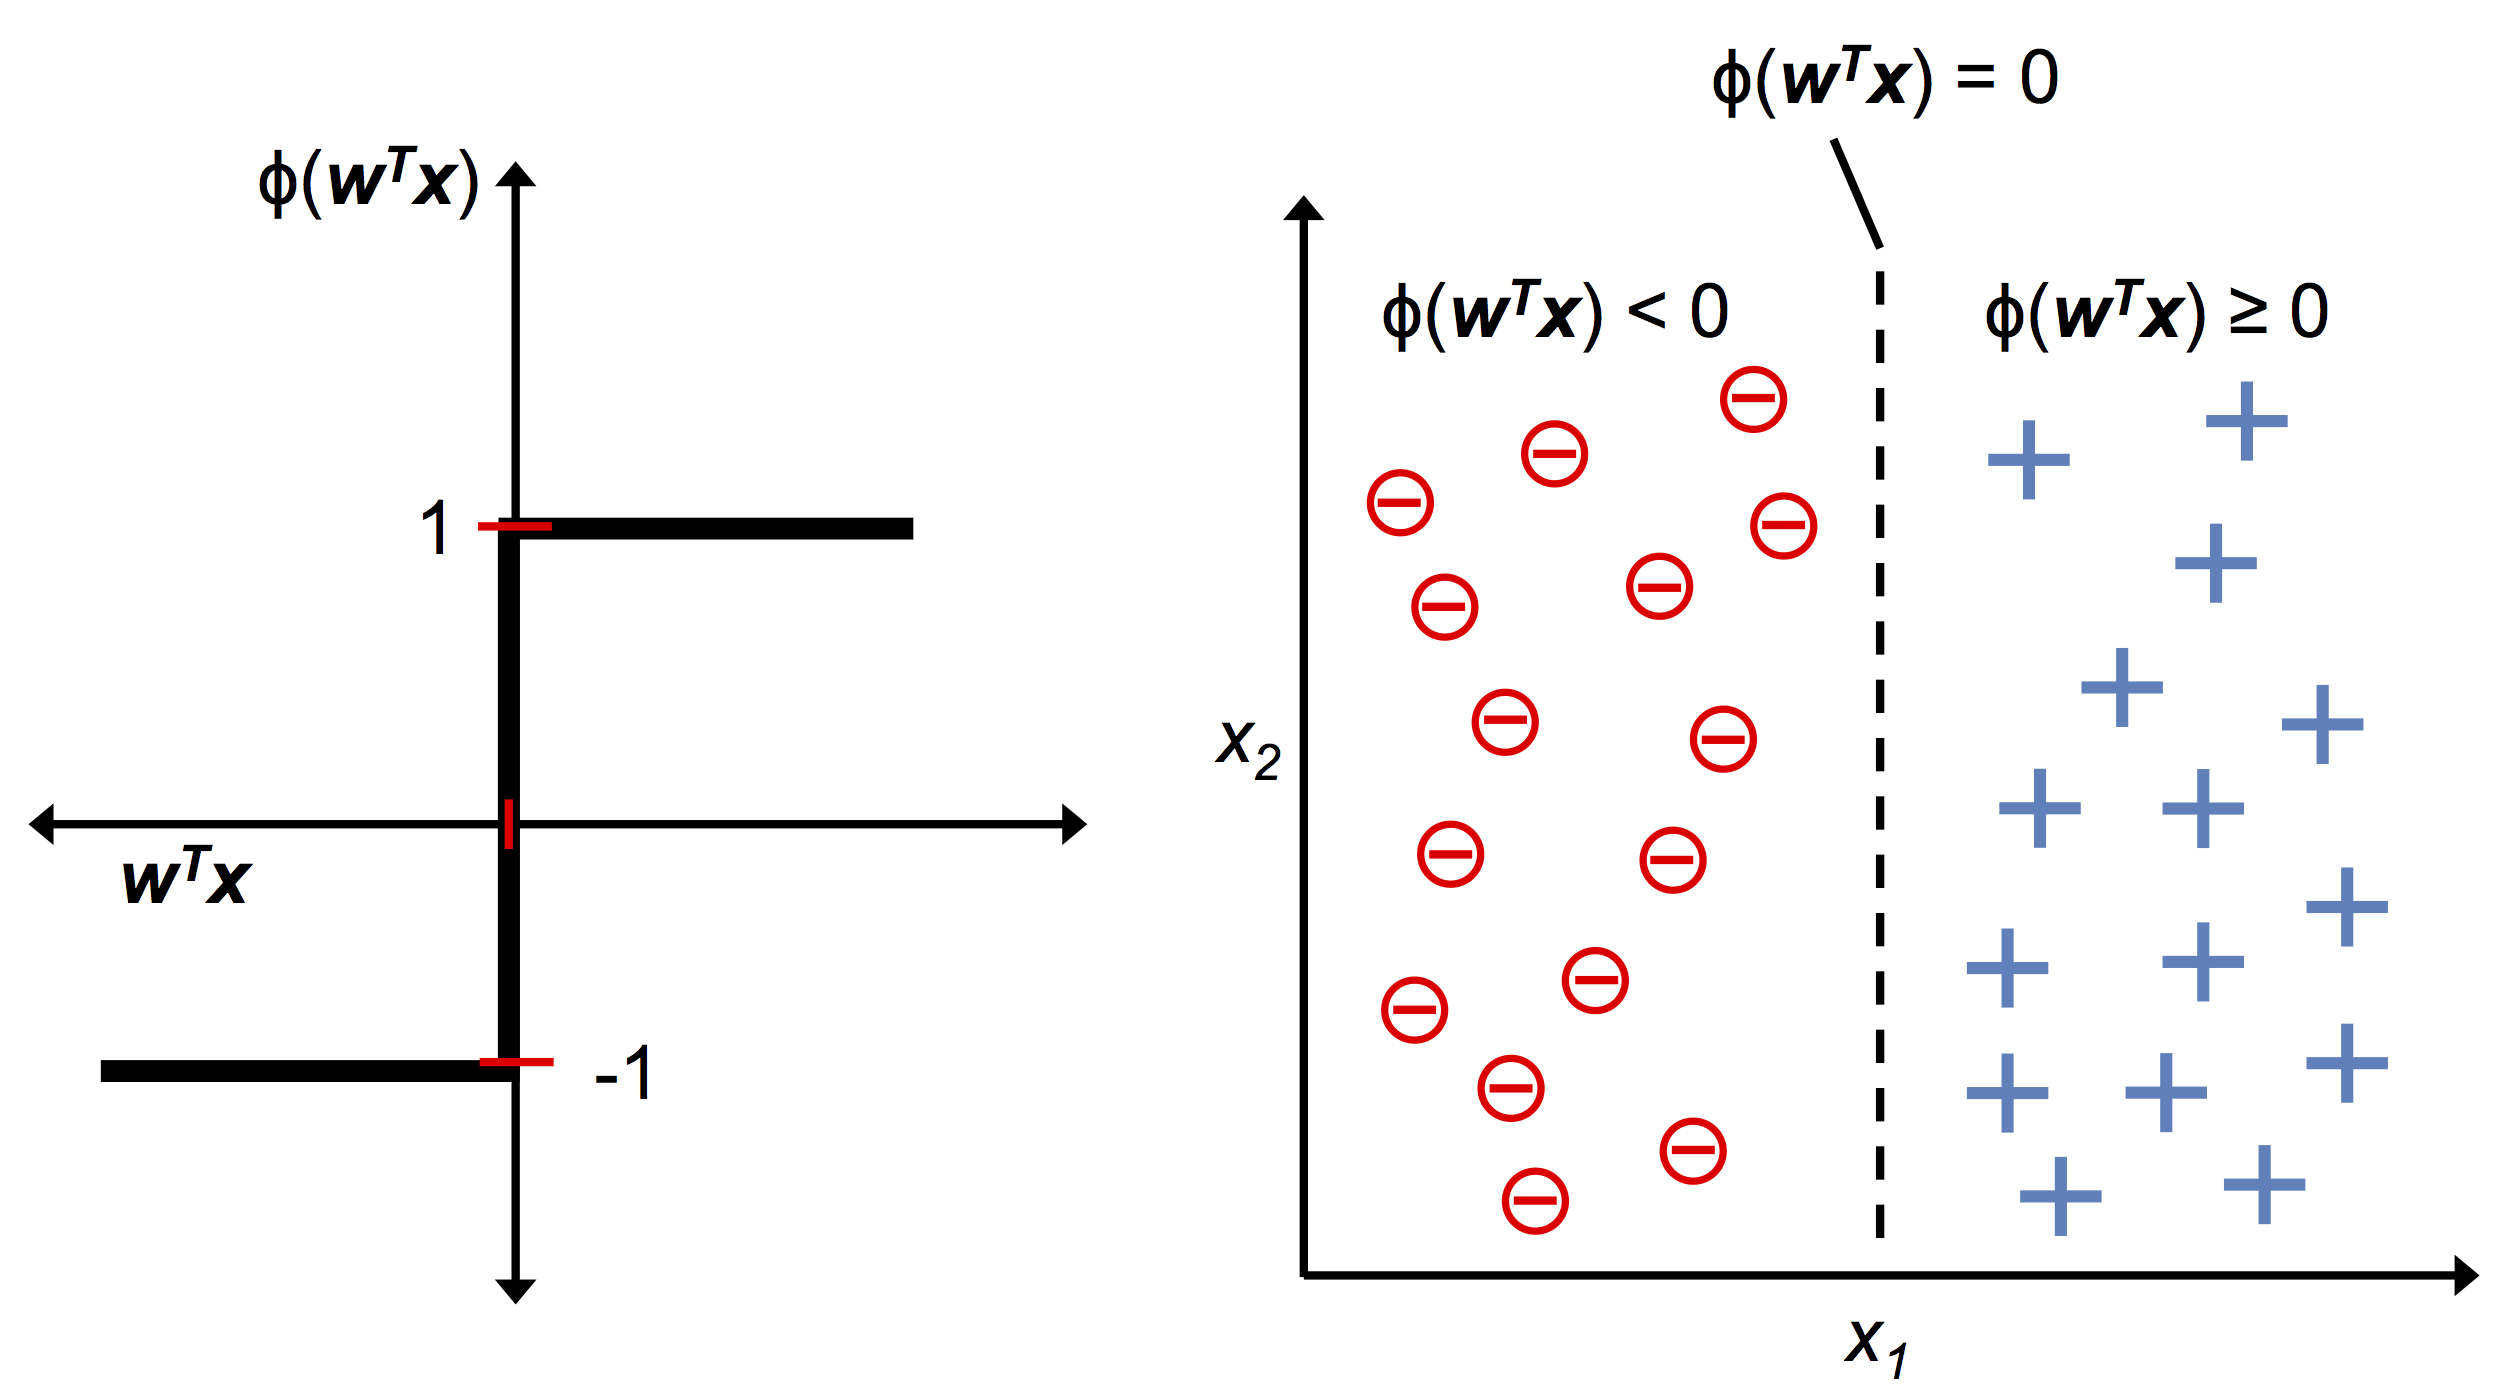

In [7]:
Image(filename='./images/02_02.png', width=500)

## The perceptron learning rule

Regla de preceptron Rosenblatt:

1-Iniciar los pesos a cero (0) o a numeros aleatorio mas peque√±os
$$ $$
2-Para cada muestra de entrenamiento $ x^{(i)}$ :

          a. Calcular el valor de la salida yÃÇ .

          b. Actualizar pesos

$$w_j := w_j + Œîw_j $$

            Regla de aprendizaje del perceptron:

$$ Œîw_j=≈ã(y^{(i)}-yÃÇ^{(i)})x_j^{(i)} $$   
$$ ≈ã = {(0.0,1.0)}$$


Example:


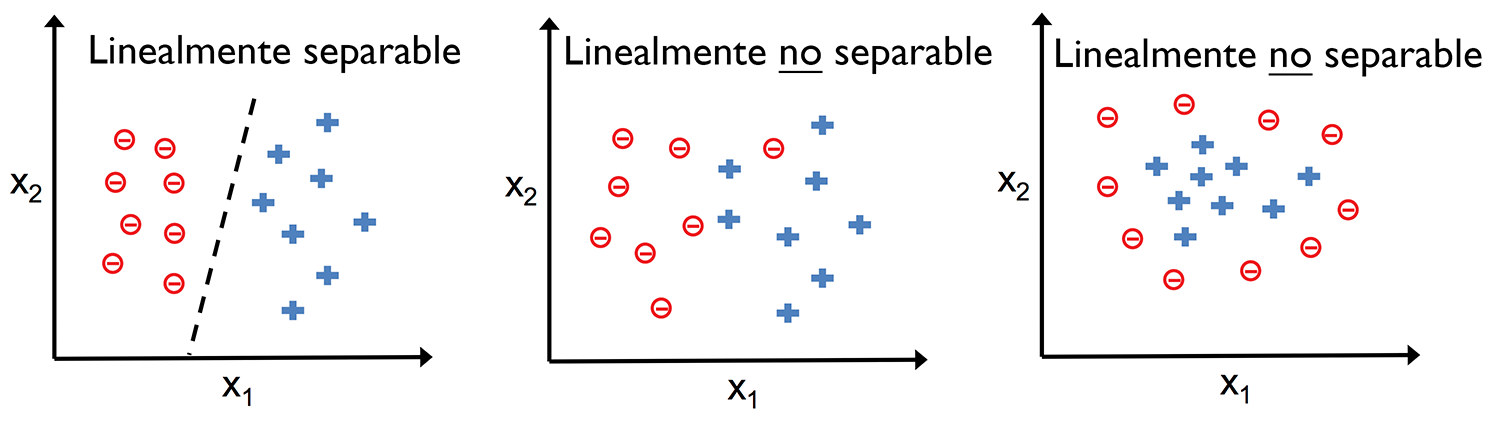

In [8]:
Image(filename='./images/02_03.png', width=700)

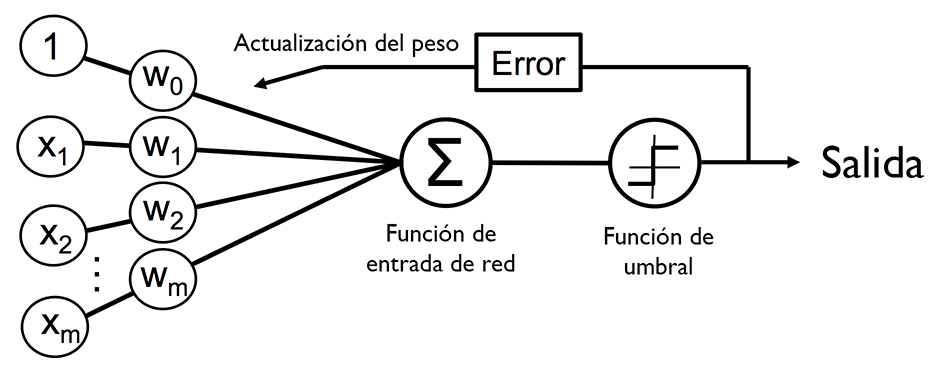

In [9]:
 Image(filename='./images/02_04.png', width=600)

<br>
<br>

# Implementing a perceptron learning algorithm in Python

## An object-oriented perceptron API

In [12]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)   #ACTIVATION

Numpy lib compute Dot product =

$$ \vec{A}.\vec{B}= |\vec{A}|.|\vec{B}|.cos œ¥ $$

$$\theta=cos^{-1} \frac{\vec{A}.\vec{B}}{|\vec{A}|.|\vec{B}|}$$

In [13]:
#proving dot multiplication

v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
v2


array([0.5, 1. , 1.5])

In [14]:
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

<br>
<br>

## Training a perceptron model on the Iris dataset

...

### Reading-in the Iris data

In [15]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

In [16]:
df.head()

0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

<hr>

### Note:


You can find a copy of the Iris dataset (and all other datasets used in this book) in the code bundle of this book, which you can use if you are working offline or the UCI server at https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data is temporarily unavailable. For instance, to load the Iris dataset from a local directory, you can replace the line

    df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

by

    df = pd.read_csv('your/local/path/to/iris.data', header=None)


In [17]:
df = pd.read_csv('iris.data', header=None)
df.tail()

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

In [18]:
type(df)

pandas.core.frame.DataFrame

<hr>

<br>
<br>

### Plotting the Iris data

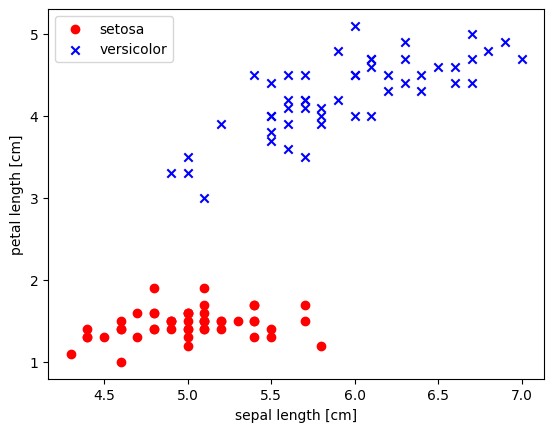

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

<br>
<br>

### Training the perceptron model

In [21]:
#https://towardsdatascience.com/perceptron-and-its-implementation-in-python-f87d6c7aa428
#Limitations
#A single-layer perceptron works only if the dataset is linearly separable.
#The algorithm is used only for Binary Classification problems. However, we can extend the algorithm to solve a multiclass classification problem by introducing one perceptron per class. i.e., each perceptron results in a 0 or 1 signifying whether or not the sample belongs to that class.

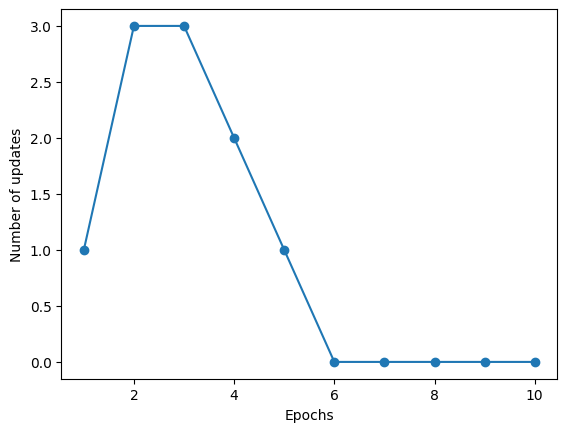

In [22]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

<br>
<br>

### A function for plotting decision regions

In [23]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

<ipython-input-23-e236ac3fb3c2>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


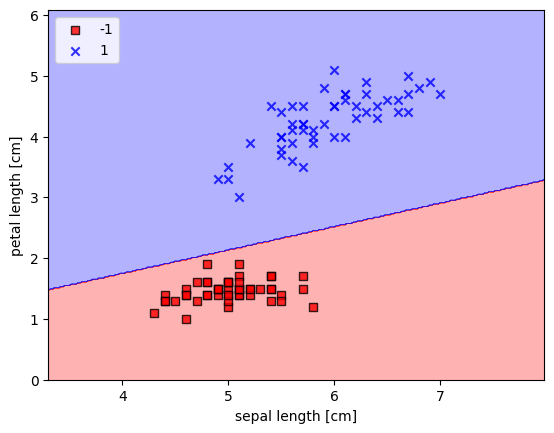

In [24]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

<br>
<br>

# Adaptive linear neurons and the convergence of learning

...

## Minimizing cost functions with gradient descent

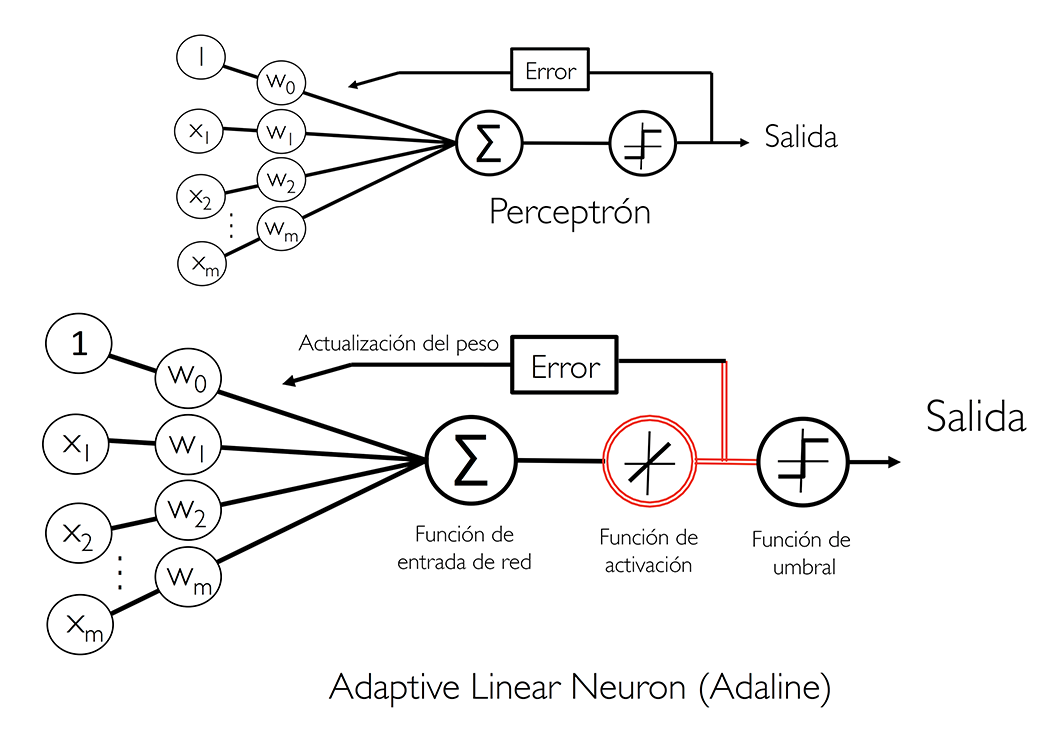

In [25]:
 Image(filename='./images/02_09.png', width=600)

Lineal Activation in Adaline:

$$ùõü(z)=w^T.x$$




Minimizing cost function using gradient descent


cost function SSE (sum of square errors):

$$ J(w) = \frac{1}{2} \sum (y^{(i)}-…∏(z^{(i)})^2 $$

Uptade weight in opposite direction of gradient $‚àá {J(w)}$ with cost function $J(w)$ :



$$w:=w+Œî{w}$$

$$Œî{w}= -≈ã ‚àáJ(w)$$

Gradient of cost function by partial derivative of cost function respecto each weight $w_j$:
$$
\frac{\partial J}{\partial w_j} = - \sum ({y}^{(i)} - \phi(z^{(i)}))x_j^{(i)} $$

$$Œîw_j=-≈ã\frac{\partial J}{\partial w_j} = -≈ã \sum ({y}^{(i)} - \phi(z^{(i)}))x_j^{(i)} $$




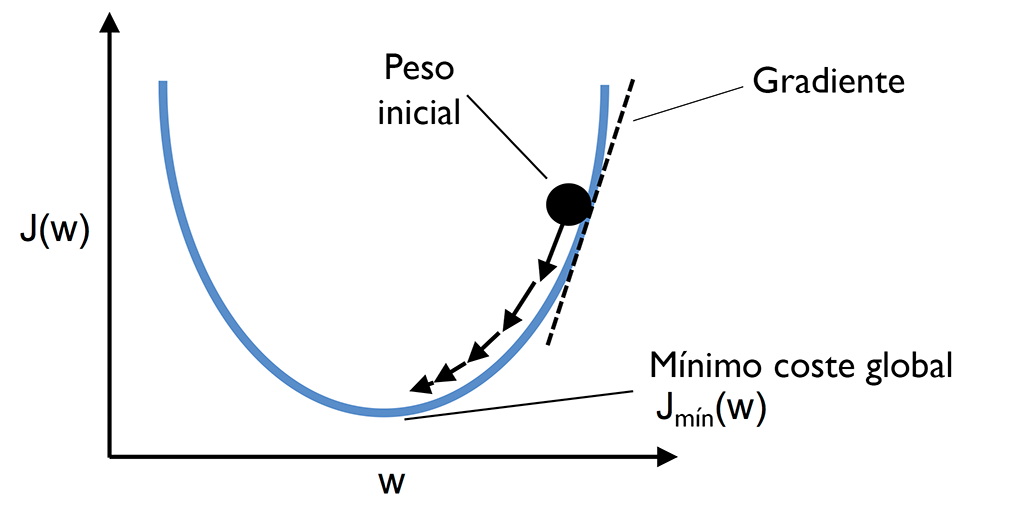

In [26]:
 Image(filename='./images/02_10.png', width=500)

<br>
<br>

## Implementing an adaptive linear neuron in Python

In [27]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation""" #ACTIVATION
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

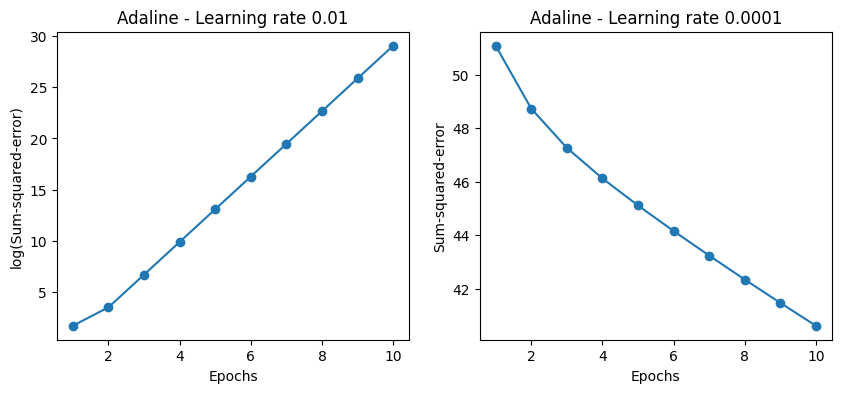

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

<br>
<br>

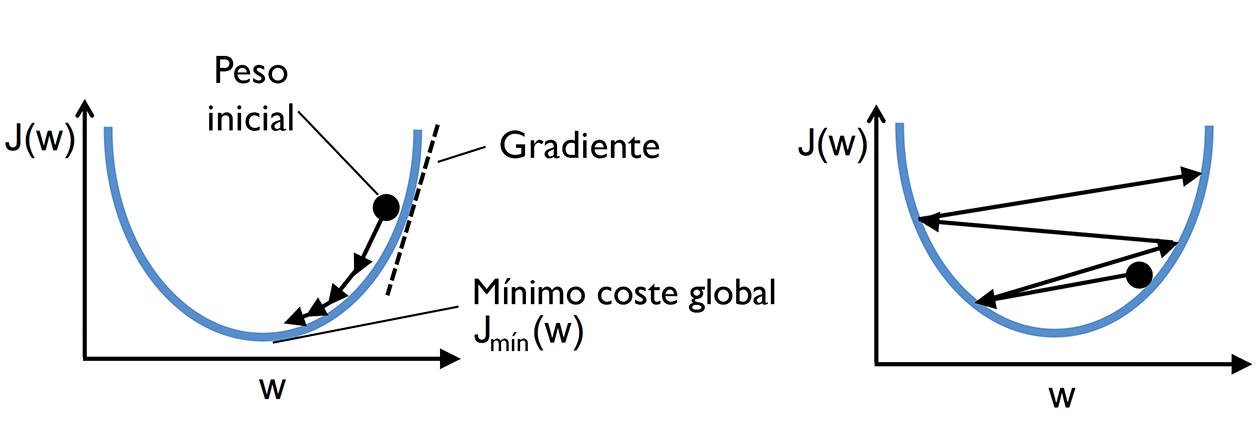

In [29]:
Image(filename='./images/02_12.png', width=700)

<br>
<br>

## Improving gradient descent through feature scaling

median:
$$Œº_j$$

standar deviation:
$$ùúé_j$$

Normalization:
$$ x'_j = \frac{(x_j-Œº_j)}{ùúé_j}$$

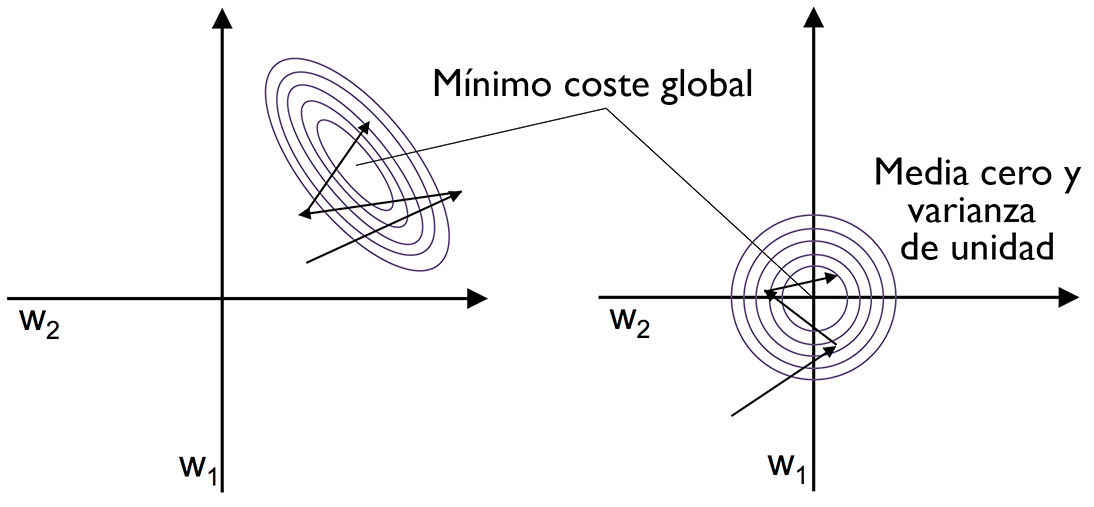

In [30]:
Image(filename='./images/02_13.png', width=700)

In [31]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

<ipython-input-23-e236ac3fb3c2>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


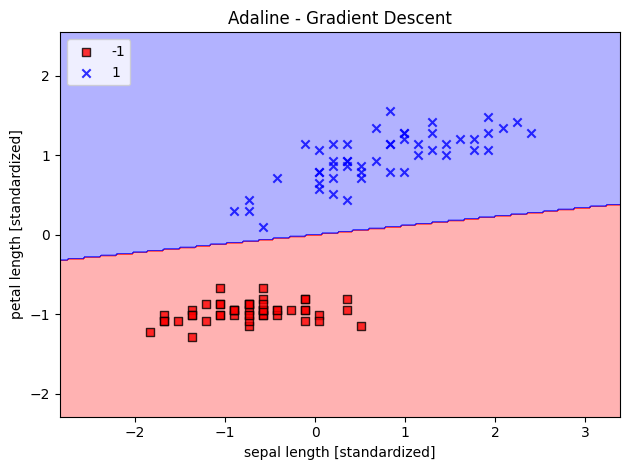

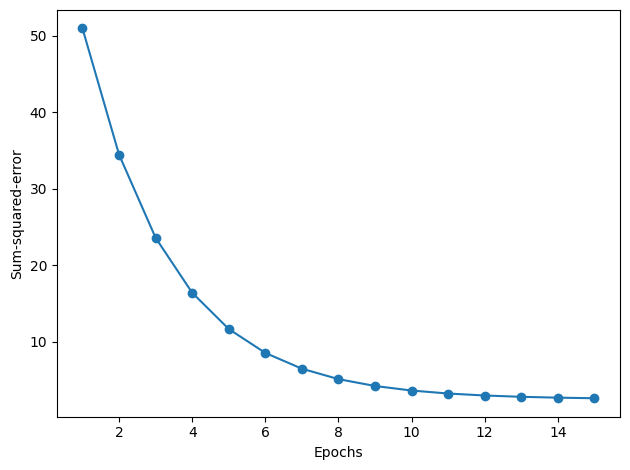

In [32]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

<br>
<br>

## Large scale machine learning and stochastic gradient descent

In [33]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle   ##ADDED SHUFFLE
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)   #ADDED SHUFFLE
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

<ipython-input-23-e236ac3fb3c2>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


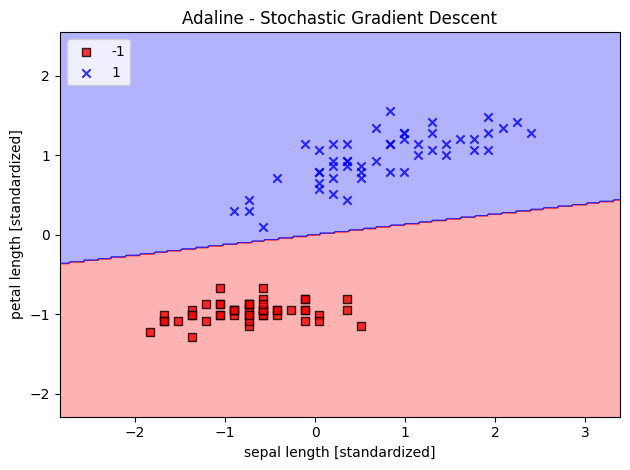

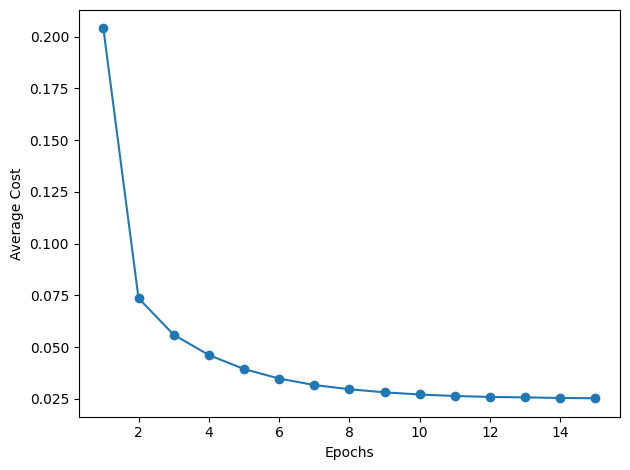

In [34]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [35]:
ada.partial_fit(X_std[0, :], y[0])

<br>
<br>

Why shuffle perform better?
https://pabloinsente.github.io/the-adaline

# Summary

...

---

Readers may ignore the following cell

In [36]:
#! python ../.convert_notebook_to_script.py --input ch02.ipynb --output ch02.py